# ***Name - Shubham Kumar Singh***

### **1. Task to be done : Predict the precentage of marks of an student based on the number of study hour.**

### **Q - What will be predicted score if a student studies for 9.25 hours / day ?**

## **Import the Libraries : -**



In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

## **Importing all the data from Dataset :-**

In [56]:
read=pd.read_csv("/content/shub.csv")
print("Data is imported successfully...")
read.head(25)

Data is imported successfully...


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [57]:
#I use describe() method so that it will display percent,mean,std,max,count of the given dataset.
read.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


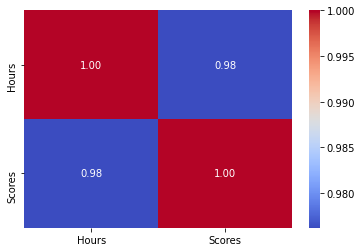

In [69]:
import seaborn as sns
sns.heatmap(read.corr(),annot=True,fmt=".2f",cmap="coolwarm")

## **Plot imported data using scatter plot :-**

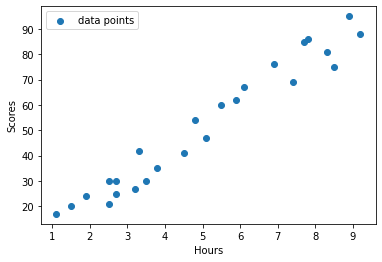

In [58]:
plt.scatter(read.Hours,read.Scores,label="data points")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

## **Prepare data for the model :-**

In [59]:
#splitting into train and test sets.
x=np.array(read[['Hours']])
y=np.array(read[['Scores']])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(f"size of train and test data is {x_train.size,y_train.size,x_test.size,y_test.size}")

size of train and test data is (20, 20, 5, 5)


# **Train the Model :-**

**Equation of line is :-  y= m*x + c**

In [60]:
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
m=model.coef_


where, m = gradient, c = intercept on y-axis, x and y are the continous variables.

In [61]:
print(f"Value of m is {m[0][0]}")
c=model.intercept_
print(f"Value of c is {c[0]}")

Value of m is 9.91065648064224
Value of c is 2.018160041434662


# **Plot the given Training Data :-**

After training model we are going to plot the data.

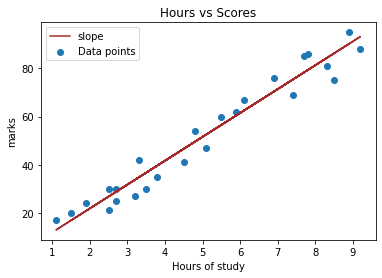

In [62]:
line=model.coef_*x + model.intercept_
plt.scatter(x,y,label='Data points')
plt.plot(x,line,color='brown', label='slope')
plt.title('Hours vs Scores',color='Black')
plt.xlabel('Hours of study',color='Black',)
plt.ylabel('marks',color='Black')
plt.legend()
plt.show()

## **Lets Test the Data :-**

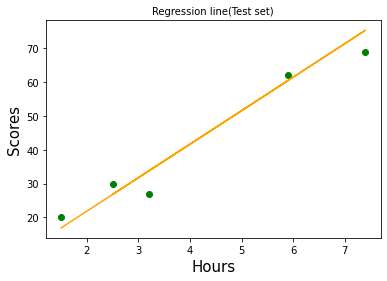

In [63]:
Y_pred=model.predict(x_test)
plt.plot(x_test,Y_pred,color='orange')
plt.scatter(x_test,y_test,color='green')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

**Compare the Actual vs Predicted Scores :-**

In [64]:
test1 = list(y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':test1,'Result':prediction})
df_compare

,Actual,Result
0,[20],[16.884144762398023]
1,[27],[33.732260779489835]
2,[69],[75.35701799818725]
3,[30],[26.79480124304026]
4,[62],[60.491033277223885]


In [65]:
#Checking Accuracy 
metrics.r2_score(y_test,Y_pred)

0.9454906892105354

In [66]:
#To check the accuracy we will use R squared value
r_square=model.score(x_train,y_train)
print(f"Value of R squared value is {r_square}")
#We will also calculate mean absolute error
mean_absolute_error=mean_absolute_error(y_test,predict)
print(f"value of Mean absolute error is {mean_absolute_error}")

Value of R squared value is 0.9515510725211553
value of Mean absolute error is 4.183859899002982


## **Final Prediction of Score :-**

In [67]:
hours=9.25
my_predict=model.predict([[hours]])
print(f"Hours = {hours}/day")
print(f"Predicted marks = {my_predict[0][0]}")

Hours = 9.25/day
Predicted marks = 93.69173248737539


## **Conlcusion**

**From the above result we can say that if a student studies 9.25 hours in a day, he will get 93.69 marks**